In [5]:
%cd ..

/home/ivanstefanov/Repositories/used-cars-price-prediction


In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
data = pd.read_csv('data/cars.csv')

In [9]:
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [11]:
data.iloc[0]

manufacturer_name          Subaru
model_name                Outback
transmission            automatic
color                      silver
odometer_value             190000
year_produced                2010
engine_fuel              gasoline
engine_has_gas              False
engine_type              gasoline
engine_capacity               2.5
body_type               universal
has_warranty                False
state                       owned
drivetrain                    all
price_usd                 10900.0
is_exchangeable             False
location_region      Минская обл.
number_of_photos                9
up_counter                     13
feature_0                   False
feature_1                    True
feature_2                    True
feature_3                    True
feature_4                   False
feature_5                    True
feature_6                   False
feature_7                    True
feature_8                    True
feature_9                    True
duration_liste

In [6]:
data.nunique(axis=0)

manufacturer_name      55
model_name           1118
transmission            2
color                  12
odometer_value       6063
year_produced          64
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        61
body_type              12
has_warranty            2
state                   3
drivetrain              3
price_usd            2677
is_exchangeable         2
location_region         6
number_of_photos       61
up_counter            384
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       786
dtype: int64

In [7]:
data.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [27]:
data.drop([ 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
            'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'], axis=1, inplace=True)

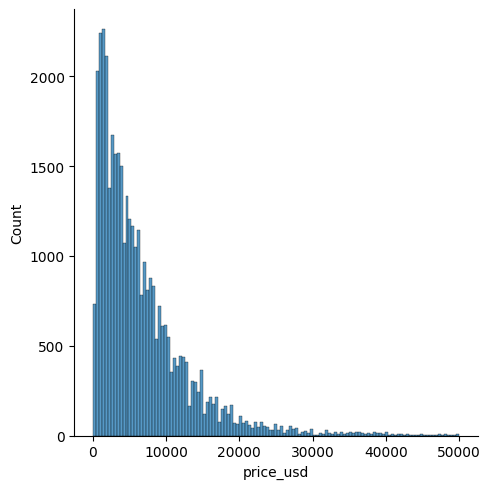

In [39]:
sns.displot(data['price_usd'])

## Explore manufacturer name

<AxesSubplot: xlabel='manufacturer_name', ylabel='count'>

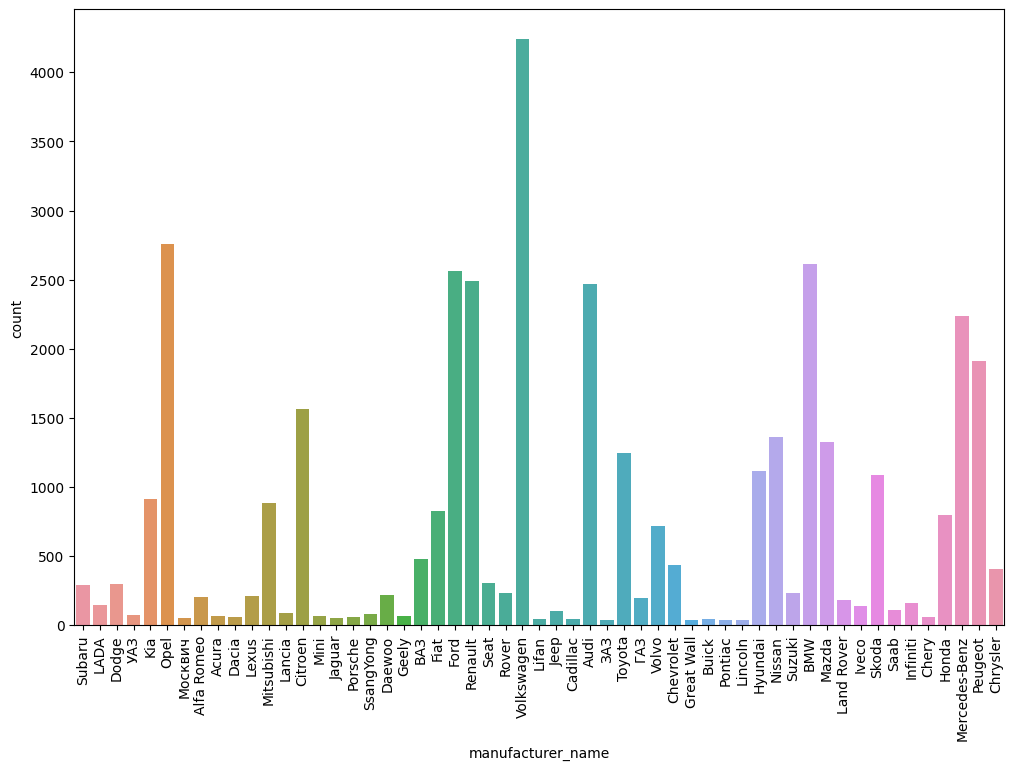

In [17]:
plt.figure(figsize=(12, 8));
plt.xticks(rotation='vertical')
sns.countplot(x=data['manufacturer_name'], )

<AxesSubplot: xlabel='manufacturer_name', ylabel='price_usd'>

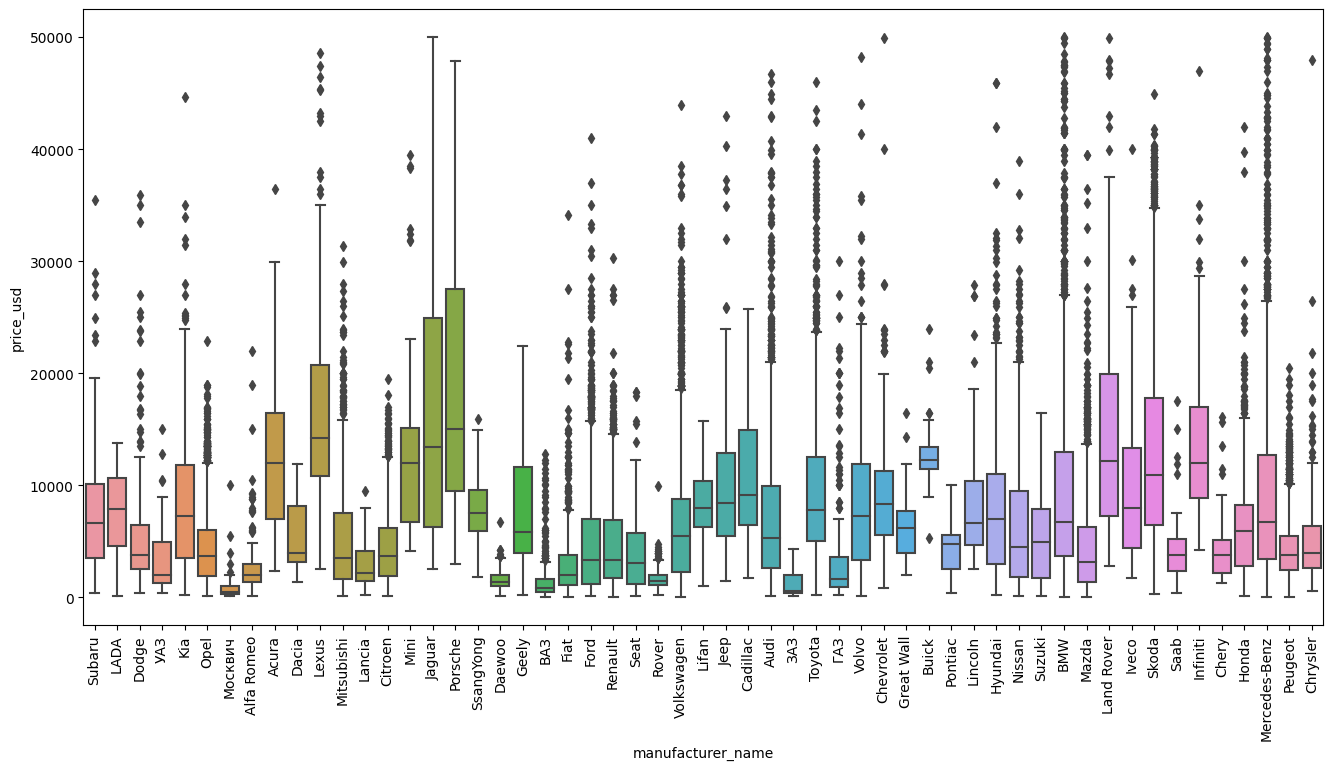

In [22]:
plt.figure(figsize=(16,8));
plt.xticks(rotation='vertical')
sns.boxplot(data=data, x='manufacturer_name', y='price_usd')

## Explore transmission

<AxesSubplot: xlabel='transmission', ylabel='count'>

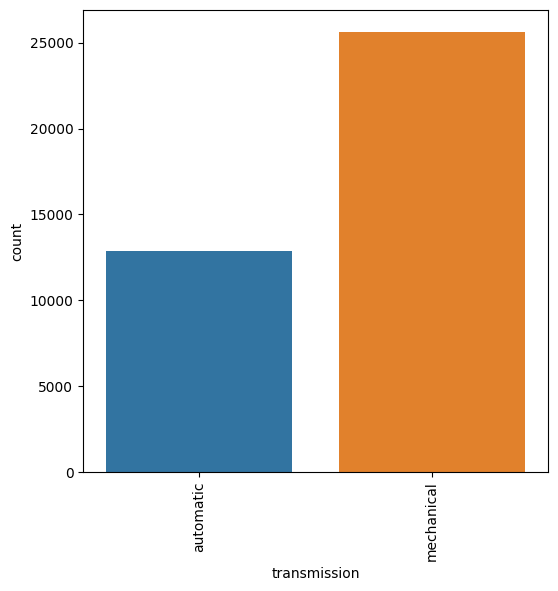

In [45]:
plt.figure(figsize=(6, 6));
plt.xticks(rotation='vertical')
sns.countplot(x=data['transmission'], )

<AxesSubplot: xlabel='transmission', ylabel='price_usd'>

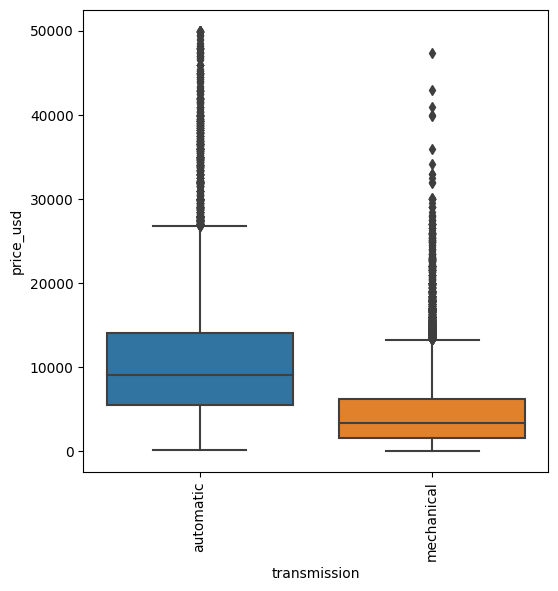

In [46]:
plt.figure(figsize=(6,6));
plt.xticks(rotation='vertical')
sns.boxplot(data=data, x='transmission', y='price_usd')

## Explore engine fuel

<AxesSubplot: xlabel='engine_fuel', ylabel='count'>

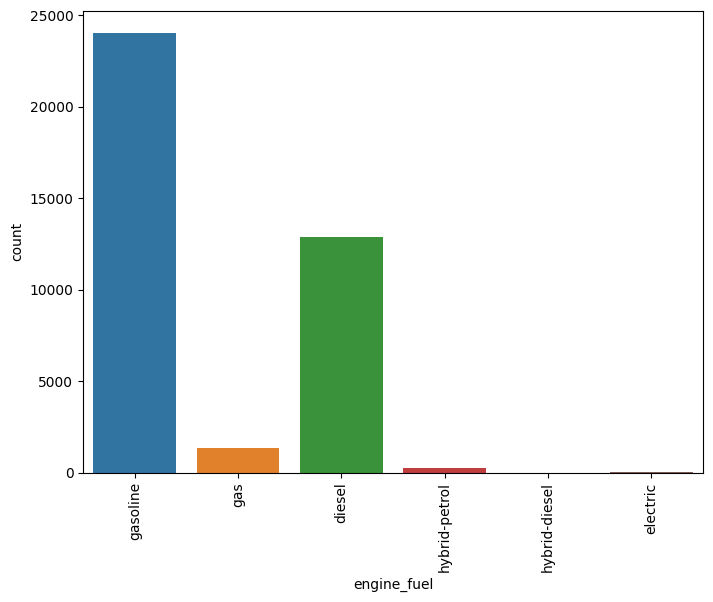

In [33]:
plt.figure(figsize=(8, 6));
plt.xticks(rotation='vertical')
sns.countplot(x=data['engine_fuel'], )

<AxesSubplot: xlabel='engine_fuel', ylabel='price_usd'>

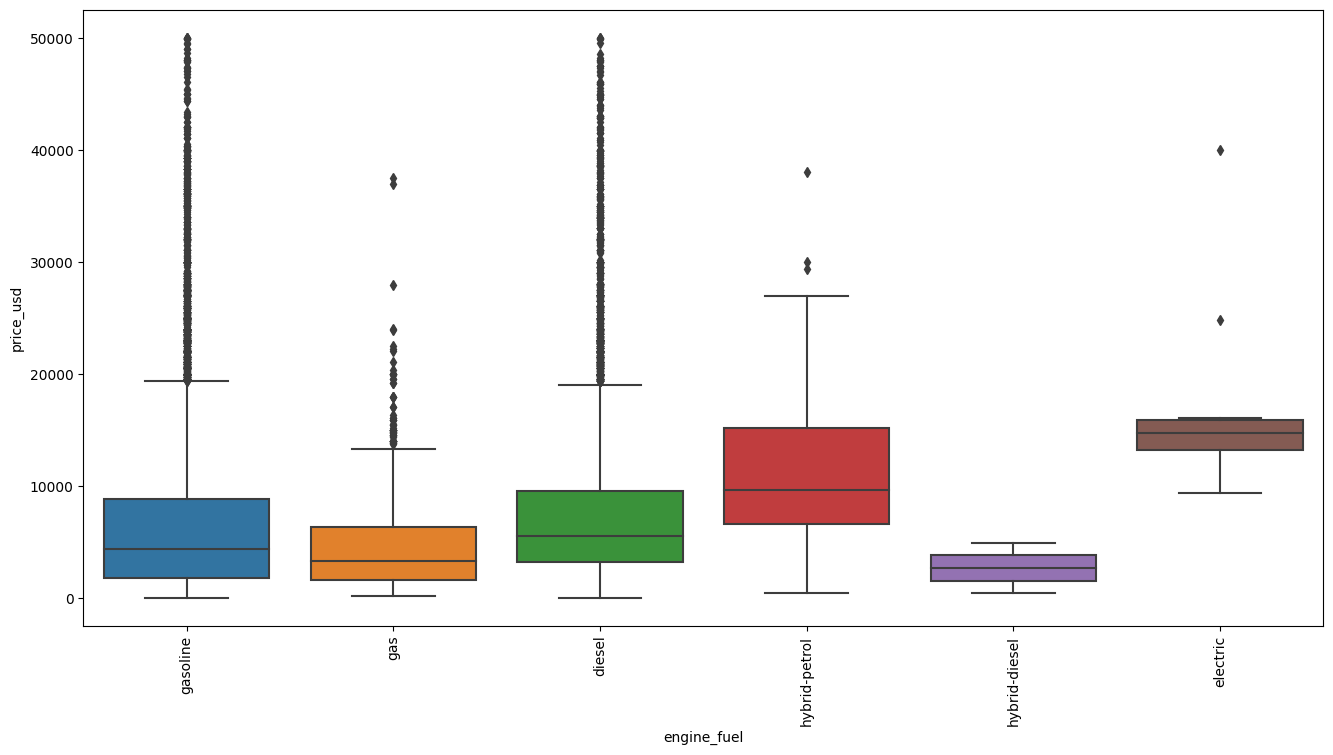

In [34]:
plt.figure(figsize=(16,8));
plt.xticks(rotation='vertical')
sns.boxplot(data=data, x='engine_fuel', y='price_usd')

## Explore body type

<AxesSubplot: xlabel='body_type', ylabel='count'>

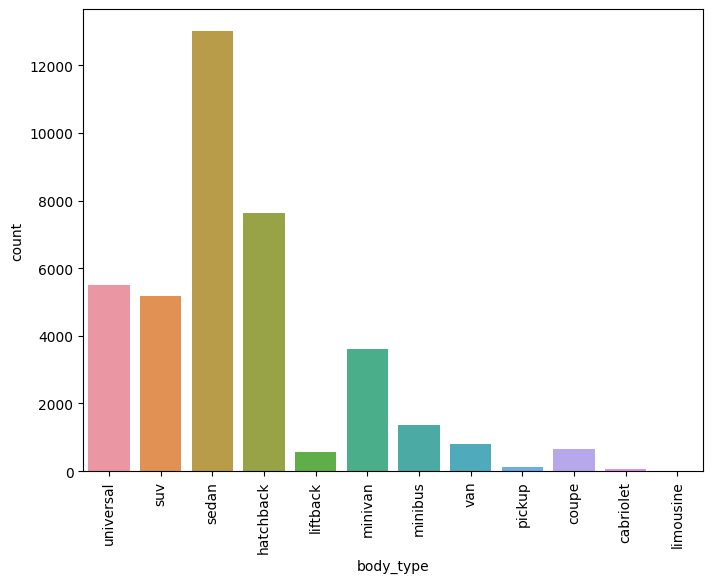

In [35]:
plt.figure(figsize=(8, 6));
plt.xticks(rotation='vertical')
sns.countplot(x=data['body_type'], )

<AxesSubplot: xlabel='body_type', ylabel='price_usd'>

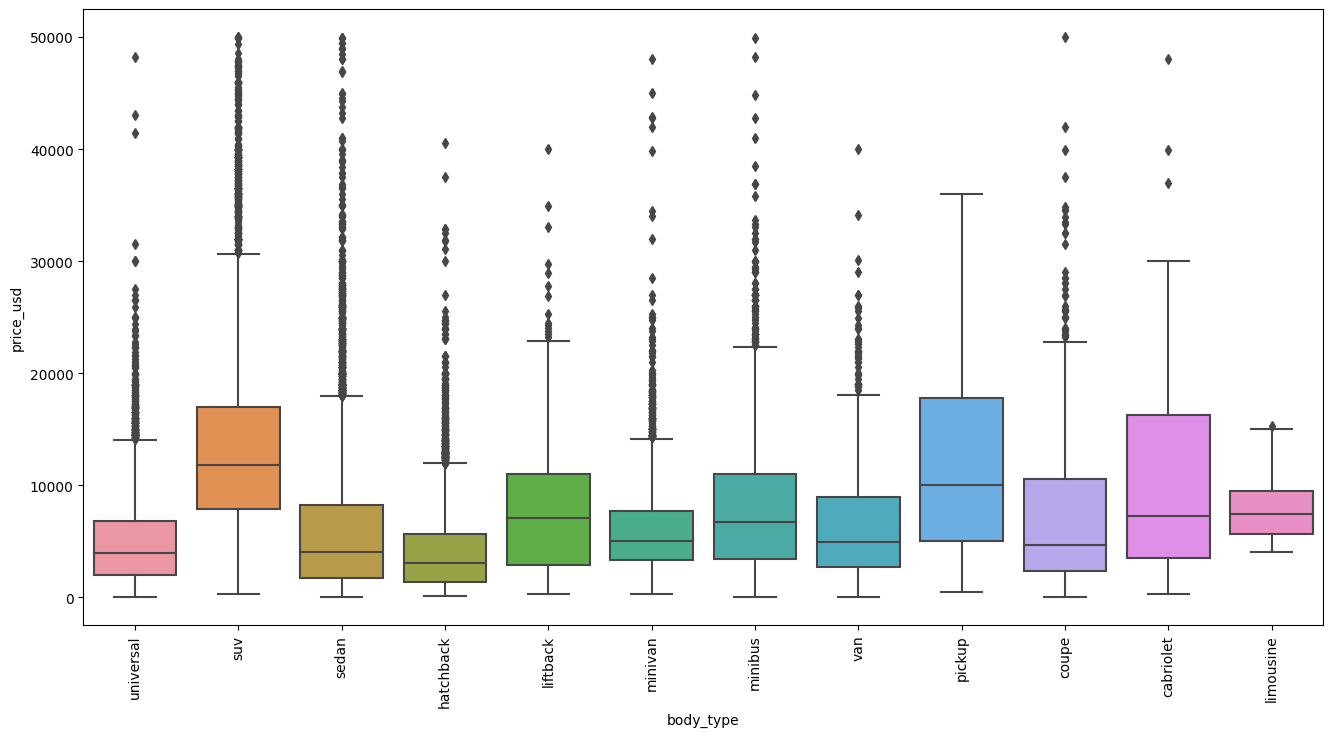

In [36]:
plt.figure(figsize=(16,8));
plt.xticks(rotation='vertical')
sns.boxplot(data=data, x='body_type', y='price_usd')

## Explore colour

<AxesSubplot: >

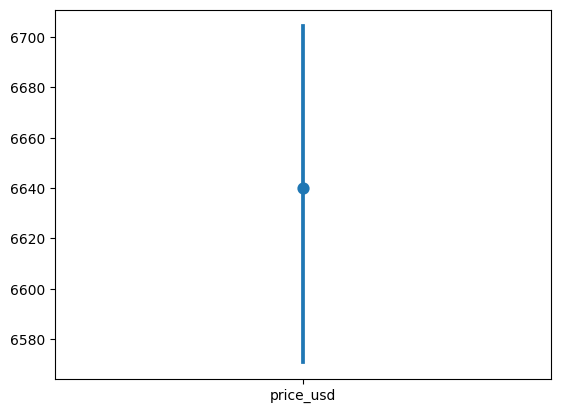

In [43]:
sns.pointplot(data[['price_usd', 'color']])